In [1]:
import torch as tc
from torch import optim, nn 
from torch.utils.data import DataLoader, TensorDataset, random_split 

from torchmetrics import Accuracy

import numpy as np 
import pandas as pd 
import  matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

from tqdm import tqdm 

/home/ahmadrezabaqerzadeh/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = pd.read_csv('/home/ahmadrezabaqerzadeh/datasets/weekly-a-p/data.csv').iloc[0:40000]

In [3]:
data.shape

(40000, 56)

In [4]:
data.isnull().sum()

ticker         0
date           0
fwd_returns    0
1              0
2              0
3              0
4              0
5              0
6              0
7              0
8              0
9              0
10             0
11             0
12             0
13             0
14             0
15             0
16             0
17             0
18             0
19             0
20             0
21             0
22             0
23             0
24             0
25             0
26             0
27             0
28             0
29             0
30             0
31             0
32             0
33             0
34             0
35             0
36             0
37             0
38             0
39             0
40             0
41             0
42             0
43             0
44             0
45             0
46             0
47             0
48             0
49             0
50             0
51             0
52             0
label          0
dtype: int64

In [5]:
data.drop(['ticker', 'date'], axis = 1, inplace = True)

In [6]:
data

,fwd_returns,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,label
0,-0.005642,-0.003846,0.003413,-0.019071,-0.009660,0.008286,0.029636,-0.022817,0.005885,0.010706,...,0.002131,0.025218,0.019846,0.015005,0.021630,-0.021976,0.014586,0.053336,-0.011001,0
1,-0.010648,0.029965,0.000784,0.041012,0.009267,0.024689,0.034265,-0.034352,-0.002313,-0.084328,...,-0.013430,0.009903,0.053175,-0.058573,-0.021875,0.007345,0.031162,-0.010281,-0.036922,0
2,-0.010184,0.090171,-0.052591,-0.005359,0.105501,-0.027702,-0.003553,0.004392,-0.069239,-0.084230,...,0.009283,-0.103827,0.004009,-0.019974,0.007588,-0.054290,0.038561,-0.035324,-0.007138,0
3,-0.001361,0.044034,-0.014006,-0.017882,0.013947,0.040639,0.019231,-0.018868,-0.010057,0.005780,...,0.004367,0.000000,0.010294,-0.028571,0.070336,-0.006079,0.006116,-0.010590,-0.006015,0
4,-0.008553,-0.001490,0.003888,0.010375,0.112630,-0.000448,0.099114,-0.007090,-0.001587,-0.055888,...,-0.026303,-0.015056,0.007988,-0.009856,-0.041574,-0.018823,0.030419,0.003016,-0.010358,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0.025394,-0.013230,-0.020016,-0.028500,0.007368,-0.062442,-0.007455,-0.013103,0.014049,-0.018455,...,-0.024192,-0.048027,-0.023723,0.028147,0.001709,0.011844,-0.002312,-0.045661,0.024295,1
39996,-0.047619,-0.060703,0.064626,-0.114458,0.044025,0.012739,-0.059880,0.077419,0.000000,0.065292,...,0.000000,-0.084270,-0.105528,-0.095455,-0.090909,0.000000,0.085202,0.179894,0.000000,0
39997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
39998,0.002283,0.032532,-0.002352,-0.028780,0.034988,-0.027435,-0.071338,0.014649,0.015311,0.013298,...,0.003326,-0.020098,0.009874,-0.008700,0.015461,0.001106,0.004442,-0.001109,0.034423,1


In [7]:
x = data.drop('label', axis = 1)
y = data['label']

In [8]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size = 0.7, random_state = 42)

In [9]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((28000, 53), (12000, 53), (28000,), (12000,))

In [10]:
xtest, xvalid, ytest, yvalid = train_test_split(xtest, ytest, test_size = 0.5, random_state = 42)

In [11]:
xtest.shape, xvalid.shape, ytest.shape, yvalid.shape

((6000, 53), (6000, 53), (6000,), (6000,))

In [12]:
xtrain = tc.FloatTensor(np.array(xtrain))
ytrain = tc.FloatTensor(np.array(ytrain))

xtest = tc.FloatTensor(np.array(xtest))
ytest = tc.FloatTensor(np.array(ytest))

xvalid = tc.FloatTensor(np.array(xvalid))
yvalid = tc.FloatTensor(np.array(yvalid))

In [13]:
mean = xtrain.mean(dim = 0)
std = xtrain.std(dim = 0)

In [14]:
xtrain = (xtrain - mean)/std 
xtest = (xtest - mean)/std 
xvalid = (xvalid - mean)/std

In [15]:
train_dataset = TensorDataset(xtrain, ytrain)
valid_dataset = TensorDataset(xvalid, yvalid)

In [16]:
train_loader = DataLoader(train_dataset, batch_size = 256, shuffle = True)
valid_loader = DataLoader(valid_dataset, batch_size = 512, shuffle = False)


In [17]:
class RNNModel(nn.Module):
    
    def __init__(self, RNN, input_size, hidden_size, layer, bidirectional):
        super().__init__()
        
        self.rnn = RNN(input_size, hidden_size = hidden_size, num_layers = layer, bidirectional = bidirectional)
    
        self.fc = nn.LazyLinear(1)
        
    def forward(self, x):
        
        y, hidden_state = self.rnn(x)
        
        y = self.fc(y)
        
        return y

In [18]:
model = RNNModel(nn.LSTM, 53, 64, 1, False)

/home/ahmadrezabaqerzadeh/.local/lib/python3.10/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [19]:
x, y = next(iter(train_loader))

In [20]:
model(x).shape

torch.Size([256, 1])

In [21]:
device = 'cuda' if tc.cuda.is_available() else 'cpu'

In [22]:
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

In [23]:
def train_one_epoch(model, train_loader, loss_func, optimizer, epoch):
    
    train_loss = AverageMeter()
    train_acc = Accuracy(task = 'binary').to(device)
    
    with tqdm(train_loader, unit = 'batch') as tepoch:
        
        if epoch is not None:
            tepoch.set_description(f'Epoch={epoch}')
        
        for x, y in tepoch:
            
            x = x.to(device)
            y = y.to(device)
            
            yp = model(x)
            loss = loss_func(yp.squeeze(), y)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
            train_loss.update(loss.item())
            train_acc(yp.squeeze(), y)
            
            tepoch.set_postfix(loss = train_loss.avg, accuracy = train_acc.compute().item() * 100)
            
    return model, train_loss.avg, train_acc.compute().item()

In [24]:
def validation(model, valid_loaedr, loss_func):
    model.eval()

    valid_loss=AverageMeter()
    valid_acc=Accuracy(task='binary').to(device)

    for x, y in valid_loaedr:

        x=x.to(device)
        y=y.to(device)

        yp=model(x)
        loss=loss_func(yp.squeeze(), y)

        valid_loss.update(loss.item())
        valid_acc(yp.squeeze(), y)

    print(f'valid loss={valid_loss.avg:.4}, accuracy={valid_acc.compute() * 100 :.4}')
    print()

    return valid_loss.avg, valid_acc.compute().item()

In [25]:
model = model.to(device)

In [26]:
optimizer = optim.Adam(model.parameters(), lr = 0.01, betas = [0.9, 0.99])
loss_func = nn.BCEWithLogitsLoss()

In [28]:
train_one_epoch(model, train_loader, loss_func, optimizer, 1)

Epoch=1:  96%|█████████▋| 106/110 [00:02<00:00, 42.37batch/s, accuracy=95.3, loss=0.124]


KeyboardInterrupt: 

In [37]:
model = RNNModel(nn.RNN, 53, 128, 2, False).to(device)

/home/ahmadrezabaqerzadeh/.local/lib/python3.10/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [38]:
optimizer = optim.Adam(model.parameters(), lr = 0.002, betas = [0.9, 0.99])
loss_func = nn.BCEWithLogitsLoss()

In [39]:
loss_train_hist, acc_train_hist = [], []
loss_valid_hist, acc_valid_hist = [], []

best_loss = tc.inf 
best_model = [0]

In [40]:
N = 25
for i in range(N):

  model, train_loss, train_acc = train_one_epoch(model, train_loader, loss_func, optimizer, i)
  valid_loss, valid_acc = validation(model,valid_loader,loss_func)

  acc_train_hist.append(train_acc)
  loss_train_hist.append(train_loss)

  acc_valid_hist.append(valid_acc)
  loss_valid_hist.append(valid_loss)

  if valid_loss<best_loss:
    best_loss = valid_loss
    best_model[0] == model
    print('model saved!')

Epoch=0: 100%|██████████| 110/110 [00:04<00:00, 22.10batch/s, accuracy=87.2, loss=0.291]


valid loss=0.1752, accuracy=93.2

model saved!


Epoch=1: 100%|██████████| 110/110 [00:04<00:00, 22.05batch/s, accuracy=94.5, loss=0.142]


valid loss=0.1264, accuracy=94.9

model saved!


Epoch=2: 100%|██████████| 110/110 [00:04<00:00, 23.44batch/s, accuracy=95.6, loss=0.116]


valid loss=0.1058, accuracy=95.97

model saved!


Epoch=3: 100%|██████████| 110/110 [00:04<00:00, 24.45batch/s, accuracy=96.5, loss=0.0942]


valid loss=0.1029, accuracy=96.17

model saved!


Epoch=4: 100%|██████████| 110/110 [00:04<00:00, 24.78batch/s, accuracy=96.8, loss=0.0862]


valid loss=0.07245, accuracy=97.58

model saved!


Epoch=5: 100%|██████████| 110/110 [00:04<00:00, 24.59batch/s, accuracy=97.1, loss=0.0784]


valid loss=0.07816, accuracy=97.1



Epoch=6: 100%|██████████| 110/110 [00:04<00:00, 24.30batch/s, accuracy=97.6, loss=0.0665]


valid loss=0.06348, accuracy=97.73

model saved!


Epoch=7: 100%|██████████| 110/110 [00:04<00:00, 24.17batch/s, accuracy=97.8, loss=0.0639]


valid loss=0.07269, accuracy=97.45



Epoch=8: 100%|██████████| 110/110 [00:04<00:00, 24.67batch/s, accuracy=98.1, loss=0.0554]


valid loss=0.06543, accuracy=97.73



Epoch=9: 100%|██████████| 110/110 [00:04<00:00, 23.92batch/s, accuracy=98.1, loss=0.0539]


valid loss=0.04053, accuracy=98.6

model saved!


Epoch=10: 100%|██████████| 110/110 [00:04<00:00, 25.00batch/s, accuracy=98.1, loss=0.0504]


valid loss=0.04582, accuracy=98.32



Epoch=11: 100%|██████████| 110/110 [00:04<00:00, 24.85batch/s, accuracy=98.4, loss=0.0447]


valid loss=0.0485, accuracy=98.37



Epoch=12: 100%|██████████| 110/110 [00:04<00:00, 23.90batch/s, accuracy=98.4, loss=0.044] 


valid loss=0.0475, accuracy=98.35



Epoch=13: 100%|██████████| 110/110 [00:04<00:00, 24.42batch/s, accuracy=98.3, loss=0.0468]


valid loss=0.04013, accuracy=98.5

model saved!


Epoch=14: 100%|██████████| 110/110 [00:04<00:00, 24.20batch/s, accuracy=98.5, loss=0.0411]


valid loss=0.05015, accuracy=98.28



Epoch=15: 100%|██████████| 110/110 [00:04<00:00, 24.43batch/s, accuracy=98.5, loss=0.0403]


valid loss=0.03682, accuracy=98.62

model saved!


Epoch=16: 100%|██████████| 110/110 [00:04<00:00, 24.09batch/s, accuracy=98.8, loss=0.0352]


valid loss=0.0415, accuracy=98.6



Epoch=17: 100%|██████████| 110/110 [00:04<00:00, 24.55batch/s, accuracy=98.9, loss=0.0317]


valid loss=0.03617, accuracy=98.63

model saved!


Epoch=18: 100%|██████████| 110/110 [00:04<00:00, 24.90batch/s, accuracy=98.8, loss=0.0355]


valid loss=0.0351, accuracy=98.72

model saved!


Epoch=19: 100%|██████████| 110/110 [00:04<00:00, 24.72batch/s, accuracy=99, loss=0.0276] 


valid loss=0.032, accuracy=98.78

model saved!


Epoch=20: 100%|██████████| 110/110 [00:04<00:00, 24.32batch/s, accuracy=99, loss=0.0287] 


valid loss=0.0451, accuracy=98.52



Epoch=21: 100%|██████████| 110/110 [00:04<00:00, 24.33batch/s, accuracy=98.8, loss=0.0341]


valid loss=0.0517, accuracy=98.28



Epoch=22: 100%|██████████| 110/110 [00:04<00:00, 23.92batch/s, accuracy=99.1, loss=0.0261]


valid loss=0.03362, accuracy=98.67



Epoch=23: 100%|██████████| 110/110 [00:04<00:00, 24.94batch/s, accuracy=99.1, loss=0.0255]


valid loss=0.03276, accuracy=98.83



Epoch=24: 100%|██████████| 110/110 [00:04<00:00, 23.99batch/s, accuracy=99.1, loss=0.0236]


valid loss=0.03892, accuracy=98.62



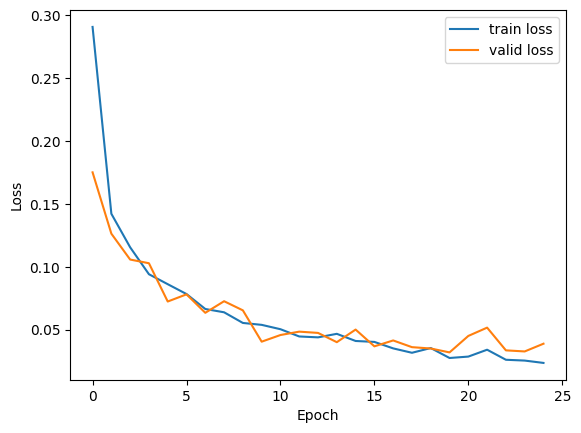

In [41]:
plt.plot(range(N), loss_train_hist, label='train loss')
plt.plot(range(N), loss_valid_hist, label='valid loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.yticks(np.arange(0,1,0.1))
plt.legend()
plt.show()

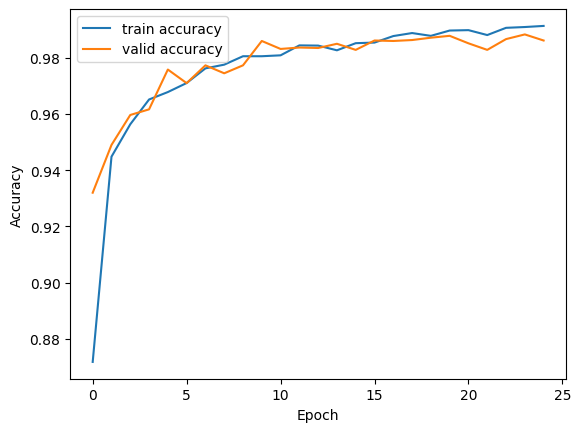

In [42]:
plt.plot(range(N), acc_train_hist, label='train accuracy')
plt.plot(range(N), acc_valid_hist, label='valid accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.yticks(np.arange(0,1,0.1))
plt.legend()
plt.show()